In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('WADI_14days_new.csv')
test = pd.read_csv('WADI_attackdataLABLE.csv')

In [3]:
print(train.shape)
print(test.shape)

(784571, 130)
(172803, 131)


In [4]:
train = train.dropna(axis=1, how='all')
train.shape

(784571, 126)

In [5]:
test = test.dropna(axis=1, how='all')
test.shape

(172803, 127)

In [6]:
train.columns

Index(['Row', 'Date', 'Time', '1_AIT_001_PV', '1_AIT_002_PV', '1_AIT_003_PV',
       '1_AIT_004_PV', '1_AIT_005_PV', '1_FIT_001_PV', '1_LS_001_AL',
       ...
       '3_MV_001_STATUS', '3_MV_002_STATUS', '3_MV_003_STATUS',
       '3_P_001_STATUS', '3_P_002_STATUS', '3_P_003_STATUS', '3_P_004_STATUS',
       'LEAK_DIFF_PRESSURE', 'PLANT_START_STOP_LOG',
       'TOTAL_CONS_REQUIRED_FLOW'],
      dtype='object', length=126)

In [7]:
test.columns

Index(['Row ', 'Date ', 'Time', '1_AIT_001_PV', '1_AIT_002_PV', '1_AIT_003_PV',
       '1_AIT_004_PV', '1_AIT_005_PV', '1_FIT_001_PV', '1_LS_001_AL',
       ...
       '3_MV_002_STATUS', '3_MV_003_STATUS', '3_P_001_STATUS',
       '3_P_002_STATUS', '3_P_003_STATUS', '3_P_004_STATUS',
       'LEAK_DIFF_PRESSURE', 'PLANT_START_STOP_LOG',
       'TOTAL_CONS_REQUIRED_FLOW', 'Attack LABLE (1:No Attack, -1:Attack)'],
      dtype='object', length=127)

In [9]:
test['Attack LABLE (1:No Attack, -1:Attack)'].value_counts()

 1    162826
-1      9977
Name: Attack LABLE (1:No Attack, -1:Attack), dtype: int64

In [8]:
# trim column names
train = train.rename(columns=lambda x: x.strip())
test = test.rename(columns=lambda x: x.strip())

In [9]:
test['Attack LABLE (1:No Attack, -1:Attack)'] = [1 if x == -1 else 0 for x in test['Attack LABLE (1:No Attack, -1:Attack)']]
test['Attack LABLE (1:No Attack, -1:Attack)'].value_counts()

0    162826
1      9977
Name: Attack LABLE (1:No Attack, -1:Attack), dtype: int64

In [10]:
test_labels = test['Attack LABLE (1:No Attack, -1:Attack)'].values
print(test_labels.shape)
print(np.sum(test_labels))

(172803,)
9977


In [16]:
def search_ratio(test_labels, val_len):
    val = test_labels[:val_len]
    test = test_labels[val_len:]
    test_ratio = (np.sum(test) /test.shape[0]) * 100
    val_ratio = (np.sum(val) / val.shape[0]) * 100
    print(f'val ratio: {val_ratio}')
    print(f'test ratio: {test_ratio}')
    print('----')
    return val_ratio, test_ratio

In [17]:
vr, tr = search_ratio(test_labels=test_labels, val_len=int(0.1 * test.shape[0]))
vr, tr = search_ratio(test_labels=test_labels, val_len=int(0.15 * test.shape[0]))
vr, tr = search_ratio(test_labels=test_labels, val_len=int(0.2 * test.shape[0]))
vr, tr = search_ratio(test_labels=test_labels, val_len=int(0.3 * test.shape[0]))

val ratio: 8.686342592592593
test ratio: 5.449997749529008
----
val ratio: 5.790895061728396
test ratio: 5.770579304616599
----
val ratio: 4.343171296296297
test ratio: 6.131232684475886
----
val ratio: 2.895447530864198
test ratio: 7.007101345039392
----


In [12]:
val_len = int(0.15 * test.shape[0])
val_len

25920

In [14]:
validation = test[:val_len]
validation.shape

(25920, 127)

In [15]:
test_clipped = test[val_len:]
test_clipped.shape

(146883, 127)

In [18]:
validation['Attack LABLE (1:No Attack, -1:Attack)'].value_counts()

0    24419
1     1501
Name: Attack LABLE (1:No Attack, -1:Attack), dtype: int64

In [19]:
test_labels_clipped = test_labels[val_len:]
test_labels_clipped.shape

(146883,)

In [20]:
validation_labels = test_labels[:val_len]
validation_labels.shape

(25920,)

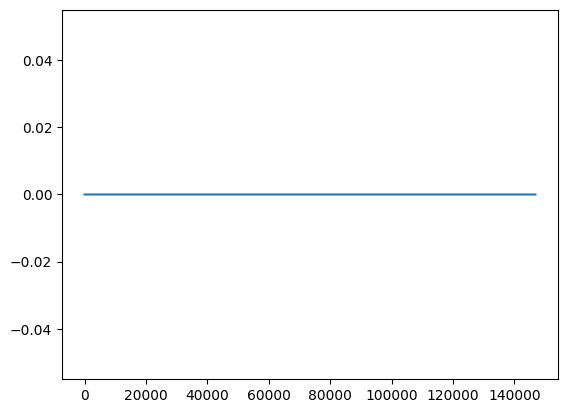

In [29]:
import matplotlib.pyplot as plt
plt.plot(test_dropped.to_numpy()[:, 7])
#plt.fill_between(np.arange(test_labels.shape[0]), test_labels, color='red', alpha=0.3, linestyle='dashed', linewidth=0.3)

In [22]:
test_labels.shape

(172803,)

In [23]:
test_dropped = test_clipped.drop(['Row', 'Date', 'Time', 'Attack LABLE (1:No Attack, -1:Attack)'], axis=1)
validation_dropped = validation.drop(['Row', 'Date', 'Time', 'Attack LABLE (1:No Attack, -1:Attack)'], axis=1)
train_dropped = train.drop(['Row', 'Date', 'Time'], axis=1)

In [104]:
missing_test = test_dropped.isna().sum()
missing_val = validation_dropped.isna().sum()
missing_train = train_dropped.isna().sum()

In [69]:
train_dropped.shape

(784571, 123)

In [ ]:
for x in missing_train:
    print(x)

In [23]:
train_dropped = train_dropped.interpolate(method='linear', limit_direction='forward', axis=0)
train_dropped = train_dropped.fillna(0)
test_dropped = test_dropped.interpolate(method='linear', limit_direction='forward', axis=0)
test_dropped = test_dropped.fillna(0)
validation_dropped = validation_dropped.interpolate(method='linear', limit_direction='forward', axis=0)
validation_dropped = validation_dropped.fillna(0)

In [24]:
validation_dropped.head()

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,1_MV_001_STATUS,...,3_MV_001_STATUS,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW
120963,179.557,0.703463,11.8693,457.262,0.299132,0.00114,0.0,0.0,52.2984,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,63.8829,1.0,0.83
120964,179.557,0.703463,11.8693,457.262,0.299132,0.00114,0.0,0.0,52.2984,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,63.8829,1.0,0.83
120965,179.557,0.703463,11.8693,457.262,0.299132,0.00114,0.0,0.0,52.2984,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,63.8829,1.0,0.83
120966,179.557,0.703463,11.8693,457.262,0.299132,0.00114,0.0,0.0,52.2984,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,63.8829,1.0,0.83
120967,179.557,0.703463,11.8693,457.262,0.299132,0.00114,0.0,0.0,52.2984,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,63.8829,1.0,0.83


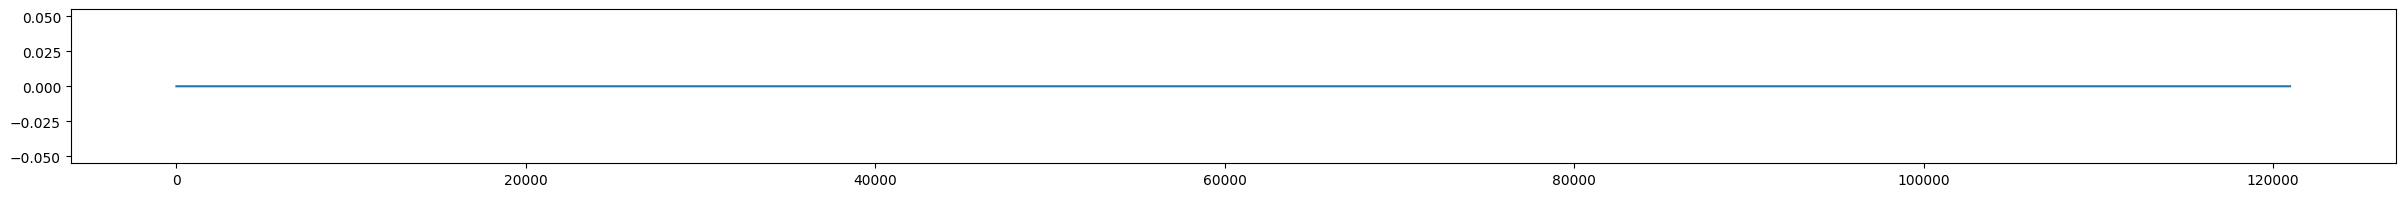

In [27]:
# plt.rcParams['figure.figsize'] = 30, 2
plt.plot(test_dropped.to_numpy()[:, 7])

In [107]:
from sklearn.preprocessing import MinMaxScaler

def scale_data(train, test, validation):
    scaler = MinMaxScaler(feature_range=(0, 1), clip=True).fit(train)

    train_scaled = scaler.transform(train)
    test_scaled = scaler.transform(test)
    validation_scaled = scaler.transform(validation)

    # train_scaled = scaler.fit_transform(train)
    # validation_scaled = scaler.fit_transform(validation)
    # test_scaled = scaler.fit_transform(test)

    return train_scaled, test_scaled, validation_scaled

In [108]:
train_values = train_dropped.values
test_values = test_dropped.values
validation_values = validation_dropped.values

In [109]:
train_norm, test_norm, val_norm = scale_data(train_values, test_values, validation_values)

In [110]:
train_norm.shape

(784571, 123)

In [111]:
labels_reshaped = np.zeros_like(test_values)
labels_reshaped.shape

(146883, 123)

In [112]:
validation_labels.shape

(25920,)

In [113]:
for idx in range(0, len(test_labels_clipped)):
    if test_labels_clipped[idx]:
        # labels_reshaped.shape[1] == 51 aka num_feats
        labels_reshaped[idx][0:labels_reshaped.shape[1]] = 1

In [114]:
validation_labels_reshaped = np.zeros_like(validation_values)
validation_labels_reshaped.shape

(25920, 123)

In [115]:
for idx in range(0, len(validation_labels)):
    if validation_labels[idx]:
        # labels_reshaped.shape[1] == 51 aka num_feats
        validation_labels_reshaped[idx][0:validation_labels_reshaped.shape[1]] = 1

In [119]:
np.save('labels.npy', labels_reshaped)
np.save('labels_validation.npy', validation_labels_reshaped)
np.save('train.npy', train_norm)
np.save('test.npy', test_norm)
np.save('validation.npy', val_norm)

In [2]:
val = np.load('../processed/WADI/validation.npy')
test = np.load('../processed/WADI/test.npy')
validation_labels = np.load('../processed/WADI/labels_validation.npy')
test_labels = np.load('../processed/WADI/labels.npy')

In [80]:
test.shape

(146883, 123)

In [3]:
validation_labels = (np.sum(validation_labels, axis=1) >= 1) + 0
test_labels = (np.sum(test_labels, axis=1) >= 1) + 0

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 30, 2

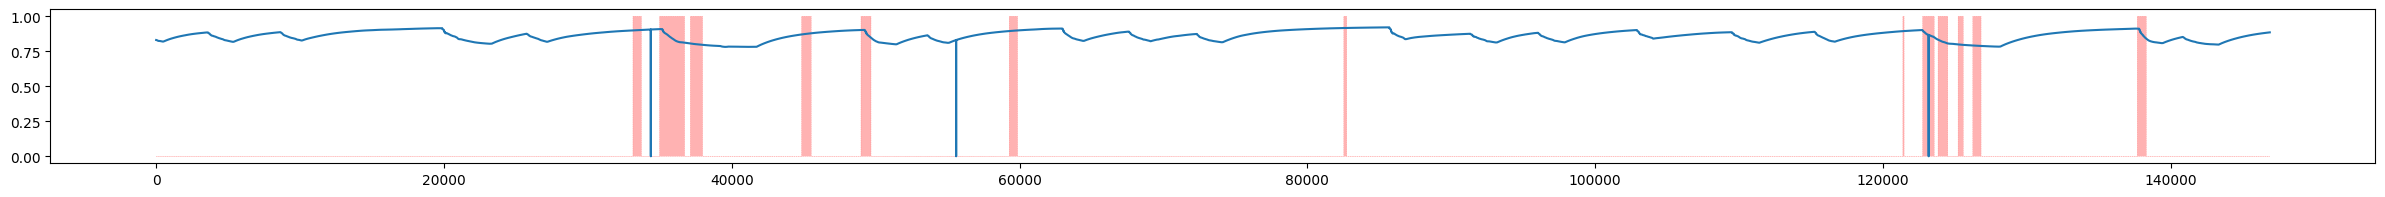

In [6]:
plt.plot(test[:, 3])
plt.fill_between(np.arange(test_labels.shape[0]), test_labels, color='red', alpha=0.3, linestyle='dashed', linewidth=0.3)

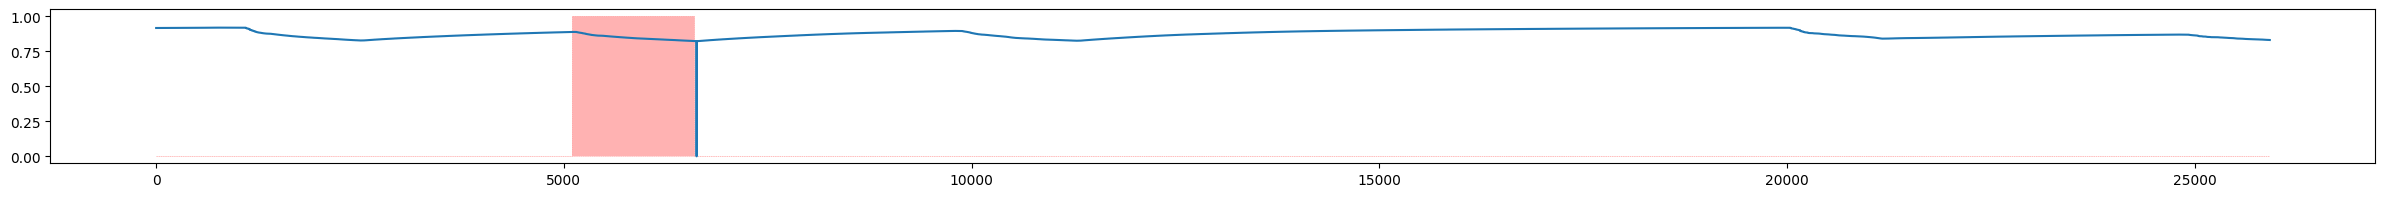

In [8]:
plt.plot(val[:, 3])
plt.fill_between(np.arange(validation_labels.shape[0]), validation_labels, color='red', alpha=0.3, linestyle='dashed', linewidth=0.3)

In [120]:
np.sum(validation_labels)

3139

In [121]:
np.sum(test_labels_clipped)

6838

In [28]:
import numpy as np
test = np.load('../processed/WADI/test.npy')
train = np.load('../processed/WADI/train.npy')

In [3]:
test.shape

(146883, 123)

In [29]:
train.shape

(784571, 123)

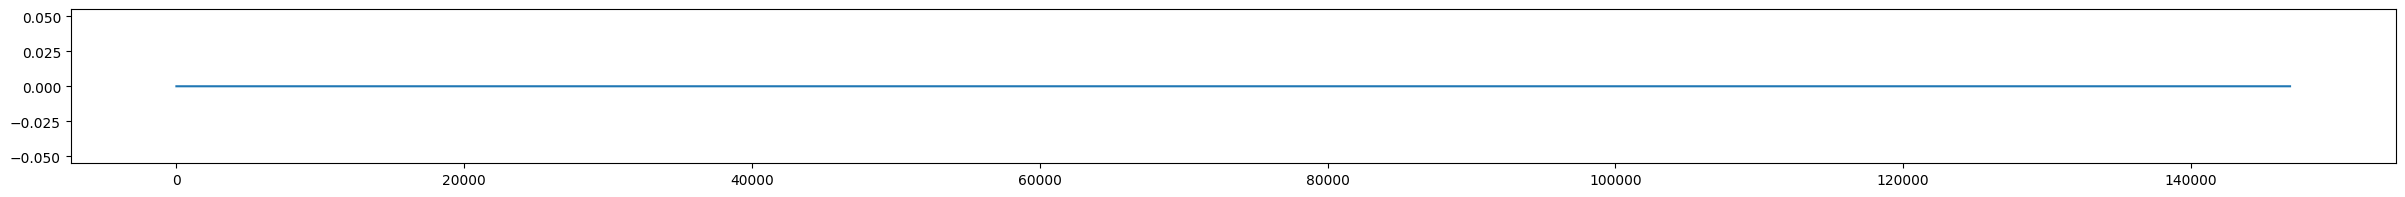

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 30, 2
plt.plot(test[:, 7])
#plt.fill_between(np.arange(validation_labels.shape[0]), validation_labels, color='red', alpha=0.3, linestyle='dashed', linewidth=0.3)